In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# 1. Columns of interest
df = pd.read_csv("./data/total_production_v1.csv")
years = df["year"].unique()
groups = df["group"].unique()
regions = df["region"].unique()
print("Years: ", years)
print("Regions: ", regions)
print("Groups: ", groups)
print("Incoming Dataframe: ")
display(df)

Years:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
Regions:  ['Africa' 'Americas' 'Asia' 'Oceania']
Groups:  ['April' 'July' 'October']
Incoming Dataframe: 


,country,group,year,units,alpha3,countryCode,region,subRegion,regionCode,subRegionCode
0,Angola,April,1990,50.3450,AGO,24,Africa,Sub-Saharan Africa,2,202
1,Bolivia,April,1990,122.7770,BOL,68,Americas,Latin America and the Caribbean,19,419
2,Brazil,April,1990,27285.6286,BRA,76,Americas,Latin America and the Caribbean,19,419
3,Burundi,April,1990,487.3930,BDI,108,Africa,Sub-Saharan Africa,2,202
4,Ecuador,April,1990,1503.8150,ECU,218,Americas,Latin America and the Caribbean,19,419
...,...,...,...,...,...,...,...,...,...,...
1645,Trinidad and Tobago,October,2019,11.6910,TTO,780,Americas,Latin America and the Caribbean,19,419
1646,Uganda,October,2019,5509.1540,UGA,800,Africa,Sub-Saharan Africa,2,202
1647,Venezuela,October,2019,650.1046,VEN,862,Americas,Latin America and the Caribbean,19,419
1648,Vietnam,October,2019,30487.1644,VNM,704,Asia,South-eastern Asia,142,35


In [39]:
# Suppport variables and functions

# Variable constants representing plot labels
YEAR = "Year"
PRODUCTION = "Production (In thousand 60kg bags)"

# Generate main title with additional information
def MAIN_TITLE(aggregate: str = ""):
  return "Global Coffee Production 1990-2019 {}".format(aggregate)

# Generate column averages
def compute_yearly_avg(cols=[]):
  cols+=["year"]
  is_cols = len(cols) > 1
  mean_data = df.groupby(cols)["units"].mean().to_frame()
  return mean_data.reset_index() if is_cols else mean_data

In [40]:
# Compute and display graph data
yearly_avg, yearly_group_avg, yearly_region_avg, yearly_sub_region_avg = compute_yearly_avg(),  compute_yearly_avg(["group"]), compute_yearly_avg(["region"]), compute_yearly_avg(["subRegion"])

display("yearly_avg", yearly_avg.head())
display("yearly_group_avg", yearly_group_avg.head())
display("yearly_region_avg", yearly_region_avg.head())
display("yearly_sub_region_avg", yearly_sub_region_avg.head())

'yearly_avg'

,units
year,
1990,1695.091993
1991,1841.212444
1992,1791.347167
1993,1668.382784
1994,1696.613987


'yearly_group_avg'

,group,year,units
0,April,1990,2913.949471
1,April,1991,3037.824671
2,April,1992,3347.728871
3,April,1993,2869.054221
4,April,1994,2856.454736


'yearly_region_avg'

,region,year,units
0,Africa,1990,684.272083
1,Africa,1991,739.699333
2,Africa,1992,538.842792
3,Africa,1993,587.620625
4,Africa,1994,610.552833


'yearly_sub_region_avg'

,subRegion,year,units
0,Latin America and the Caribbean,1990,3121.890580
1,Latin America and the Caribbean,1991,3363.366220
2,Latin America and the Caribbean,1992,3586.517860
3,Latin America and the Caribbean,1993,3056.907305
4,Latin America and the Caribbean,1994,3160.122215


In [41]:
# Generates plots for categorical data throughout the years 1990 - 2019, col_name: is used to get the set of distinct categrories
def plot_data_by_col(data, col_name):
  categories = data[col_name].unique()
  plt.figure(figsize=(10, 10))
  for category in categories:
    category_data = data[data[col_name] == category]["units"]
    plt.plot(years, category_data, label=category)
    plt.xlabel(YEAR)
    plt.ylabel(PRODUCTION)
    plt.legend()
    plt.grid()
    plt.title(MAIN_TITLE("by {}".format(col_name)))

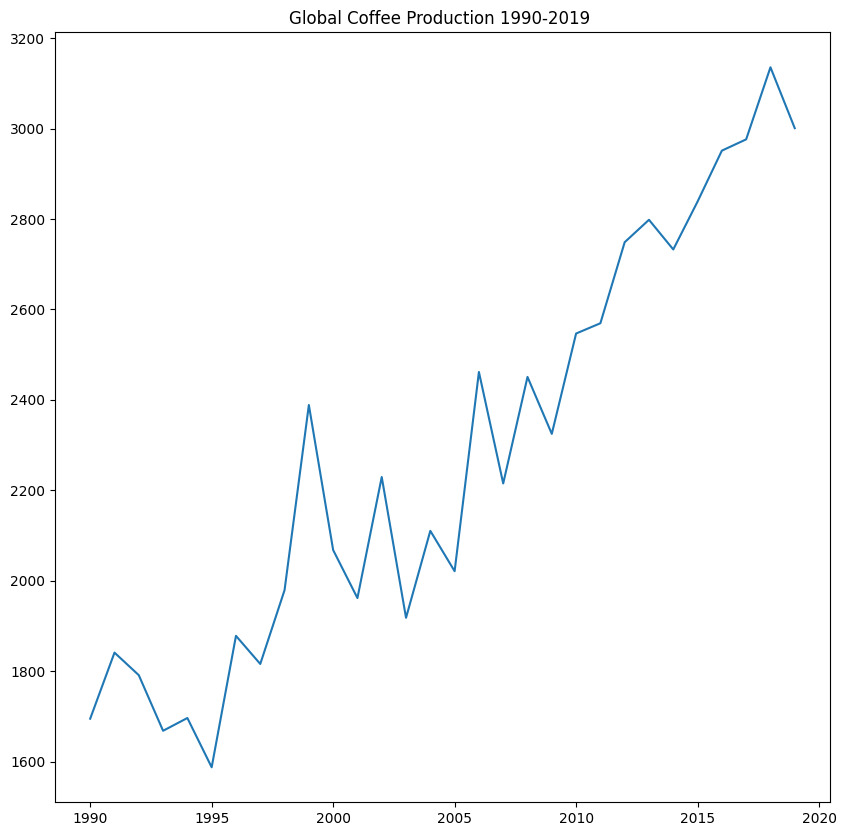

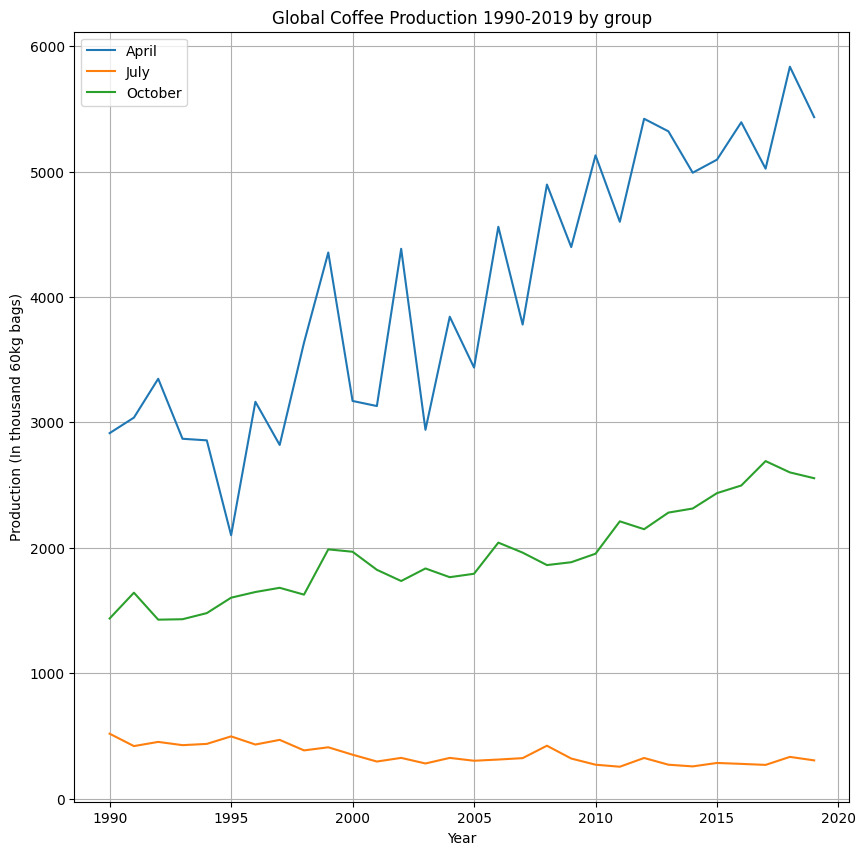

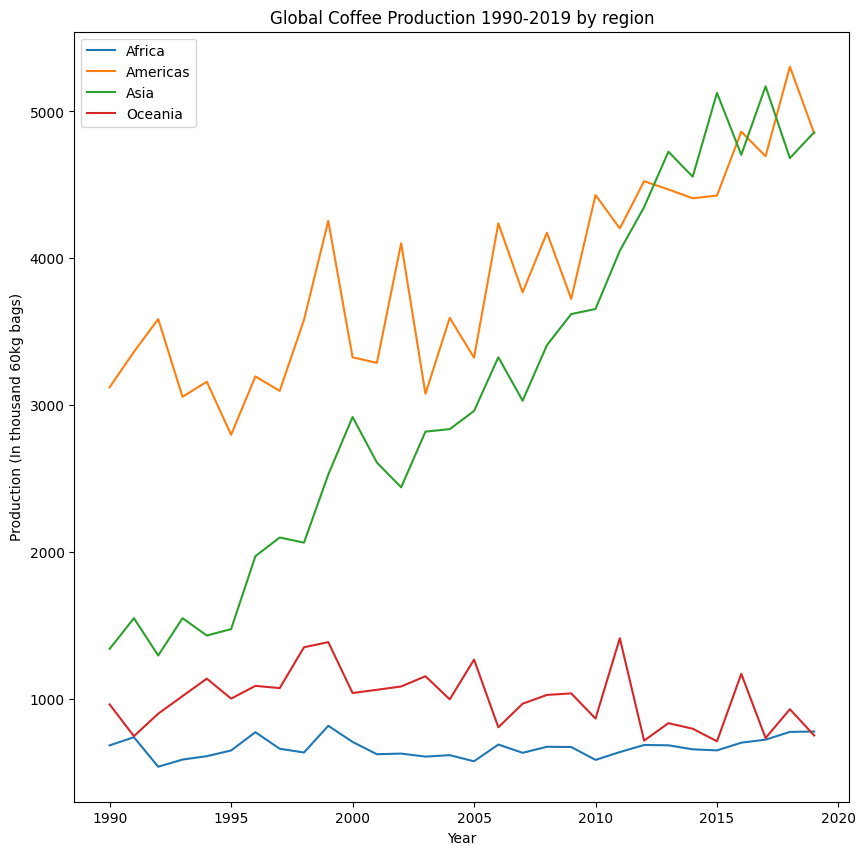

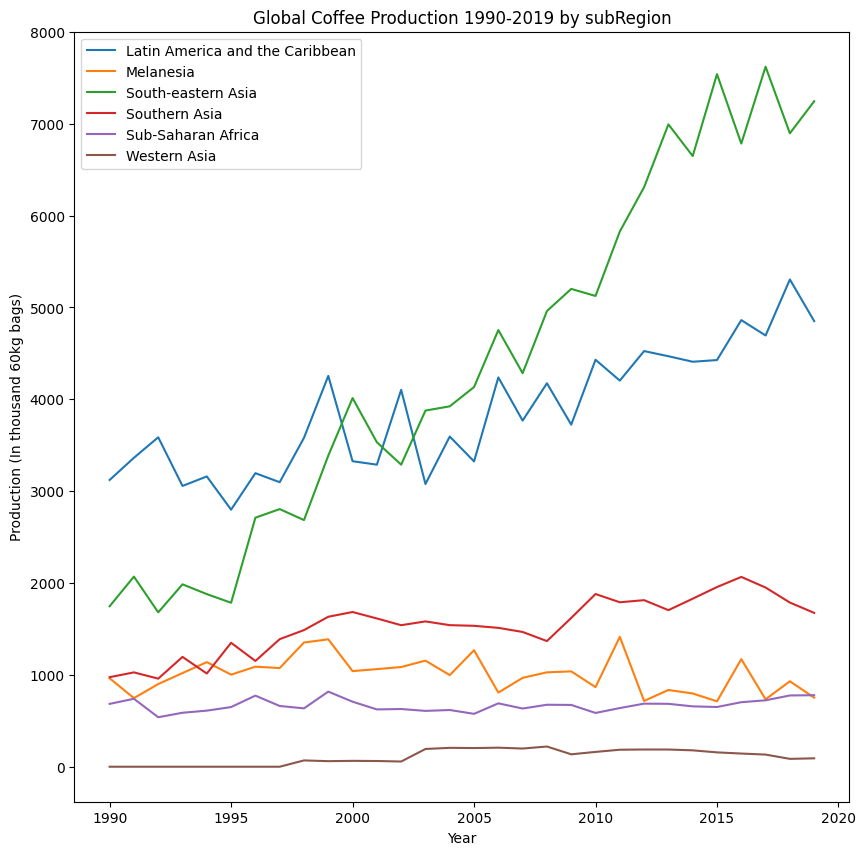

In [42]:
# Graphs

# Yearly average
plt.figure(figsize=(10, 10))
plt.plot(years, yearly_avg)
plt.xlabel(YEAR)
plt.ylabel(PRODUCTION)
plt.grid()
plt.title(MAIN_TITLE())

# Average by category from years 1990 - 2019
plot_data_by_col(yearly_group_avg, "group")
plot_data_by_col(yearly_region_avg, "region")
plot_data_by_col(yearly_sub_region_avg, "subRegion")
